In [1]:
# Import Libraries

%matplotlib inline 

import re
import numpy as np
import pandas as pd
import seaborn as sns
import pandas_profiling
import matplotlib.pyplot as plt

In [8]:
# Import Reviews dataset

beijing_reviews   = pd.read_csv('beijing_reviews.csv')
hongkong_reviews  = pd.read_csv('hongkong_reviews.csv')
singapore_reviews = pd.read_csv('singapore_reviews.csv')
taipei_reviews    = pd.read_csv('taipei_reviews.csv')
tokyo_reviews     = pd.read_csv('tokyo_reviews.csv')

In [9]:
def clean_dataset(dataset):
    '''Clean dataset and return two different dataframes.'''
    # drop null values (negligible)
    dataset = dataset[dataset['comments'].notnull() & dataset['reviewer_name'].notnull()]
    dataset = dataset[dataset['date'] >= '2018-01-01']
    dataset['year'] = pd.DatetimeIndex(dataset['date']).year
    dataset['month'] = pd.DatetimeIndex(dataset['date']).month
    dataset = dataset.sort_values(by=['date'], ascending=False)
    dataset['anomaly'] = dataset.comments.str.find('The host canceled this reservation')
    dataset['anomaly'].replace({-1: 1}, inplace=True)
    print(dataset['anomaly'].value_counts()) # just wanted to figure out what it looks like
    dataset = dataset[dataset['anomaly'] != 0]
    dataset = dataset.drop(columns=['anomaly'])
    dataset = dataset.reset_index(drop=True)
    dataset_groupby = dataset.groupby(['year', 'month'])
    dataset_groupby = dataset_groupby['comments'].count()
    dataset_groupby = dataset_groupby.to_frame('count')
    dataset_groupby.reset_index(inplace=True)
    return dataset, dataset_groupby

In [4]:
def plot_graph(dataset_groupby):
    graph = sns.FacetGrid(dataset_groupby, col="year", col_order=[2018, 2019], height=5.5, aspect=1)
    def plot(*args,**kwargs):
        kwargs["data"].plot(kind="bar", x="month", y="count", ax=plt.gca(), color="lightslategray")
    graph.map_dataframe(plot)
    graph.set_xlabels('Months', fontsize=12, ha='center')
    graph.set_ylabels('Comments Count', fontsize=12, ha='center')
    graph.fig.suptitle('Beijing Chinese Comments Count by Months (2018 VS 2019)', fontsize=14, ha='center')
    plt.subplots_adjust(top=0.89)
    plt.savefig('comments.png')
    plt.show()

In [5]:
def language_detection(texts):
    if re.search("[\u4e00-\u9FFF]", texts):
        return "zh"
    if re.search("[\uac00-\ud7a3]", texts) or re.search("[\u3040-\u30ff]", texts):
        return "ko/ja"
    if re.search("[\u0000-\u0080]", texts):
        return "eng"
    return "others"

In [6]:
def language_breakdown(name, dataset):
    dataset['language'] = dataset['comments'].apply(language_detection)
    #dataset = dataset[dataset['language'] != "others"]
    dataset = dataset.reset_index(drop=True)
    print(dataset['language'].value_counts())
    dataset_groupby_language = dataset.groupby(['year', 'month', 'language']).comments.count()
    dataset_groupby_language = dataset_groupby_language.to_frame('count')
    dataset_groupby_language = pd.pivot_table(dataset_groupby_language, index=['year', 'month'], columns=['language'],fill_value=0)
    dataset_groupby_language.to_csv(str(name + "_language.csv"))

In [10]:
# Get an overview on how many anomaly comments 
print('Beijing')
beijing_reviews, beijing_reviews_groupby     = clean_dataset(beijing_reviews)
print('Hong Kong')
hongkong_reviews, hongkong_reviews_groupby   = clean_dataset(hongkong_reviews)
print('Singapore')
singapore_reviews, singapore_reviews_groupby = clean_dataset(singapore_reviews)
print('Taipei')
taipei_reviews, taipei_reviews_groupby       = clean_dataset(taipei_reviews)
print('Tokyo')
tokyo_reviews, tokyo_reviews_groupby         = clean_dataset(tokyo_reviews)

Beijing
1    248393
0      2369
Name: anomaly, dtype: int64
Hong Kong
1    153973
0      1560
Name: anomaly, dtype: int64
Singapore
1    69382
0      697
Name: anomaly, dtype: int64
Taipei
1    236338
0       693
Name: anomaly, dtype: int64
Tokyo
1    285691
0       804
Name: anomaly, dtype: int64


In [46]:
temp = pd.read_csv('input.csv')
temp.head(10)

,year,month,count
0,2018,1,3210
1,2018,2,2568
2,2018,3,1182
3,2018,4,4066
4,2018,5,4656
5,2018,6,4957
6,2018,7,6097
7,2018,8,7558
8,2018,9,6353
9,2018,10,7478


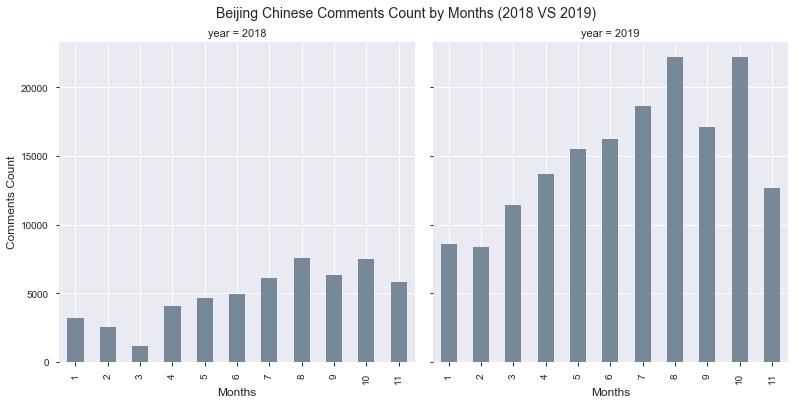

In [54]:
plot_graph(temp)

Beijing -


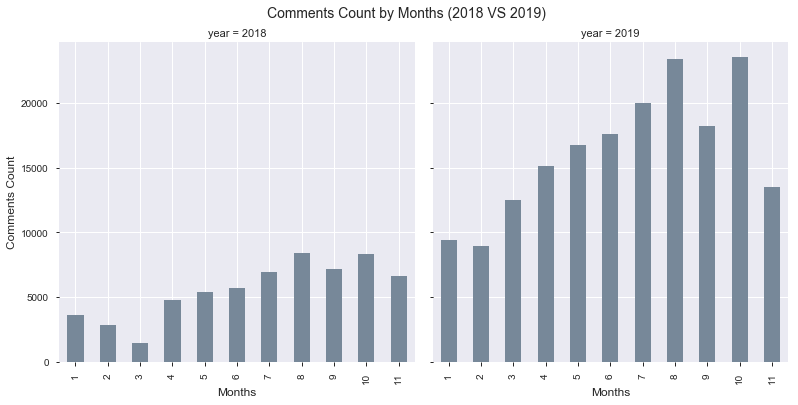

In [14]:
print('Beijing -')
plot_graph(beijing_reviews_groupby)

Hong Kong -


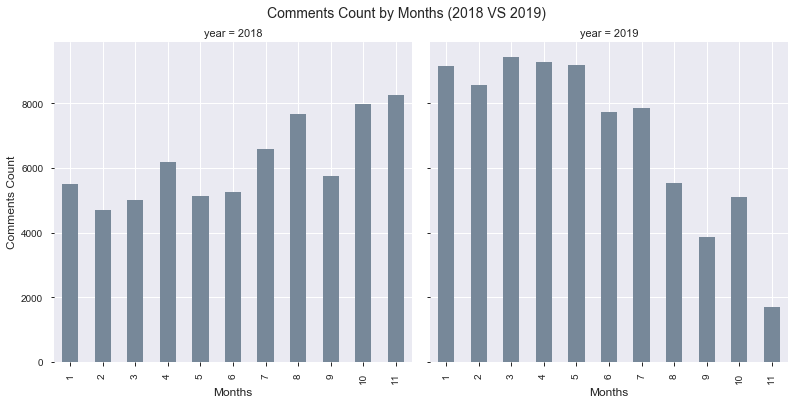

In [15]:
print('Hong Kong -')
plot_graph(hongkong_reviews_groupby)

Singapore -


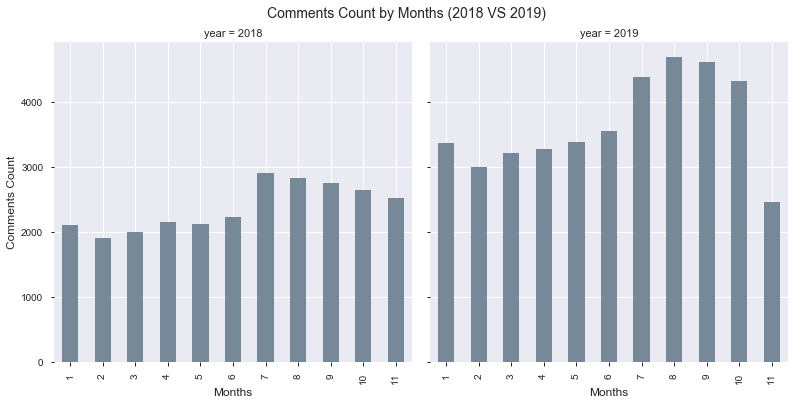

In [16]:
print('Singapore -')
plot_graph(singapore_reviews_groupby)

Taipei -


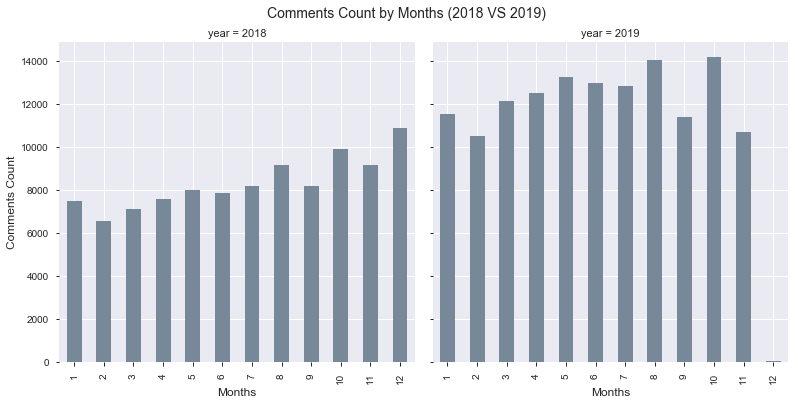

In [17]:
print('Taipei -')
plot_graph(taipei_reviews_groupby)

Tokyo -


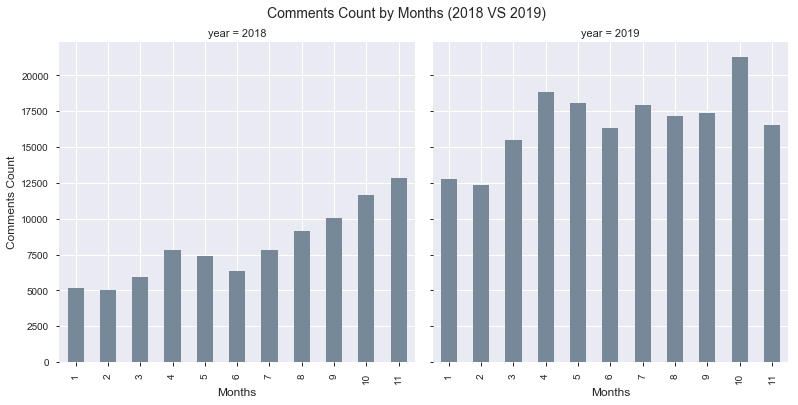

In [18]:
print('Tokyo -')
plot_graph(tokyo_reviews_groupby)

In [8]:
dataset_details(beijing_reviews)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248393 entries, 0 to 248392
Data columns (total 8 columns):
listing_id       248393 non-null int64
id               248393 non-null int64
date             248393 non-null object
reviewer_id      248393 non-null int64
reviewer_name    248393 non-null object
comments         248393 non-null object
year             248393 non-null int64
month            248393 non-null int64
dtypes: int64(5), object(3)
memory usage: 15.2+ MB
None
   listing_id         id        date  reviewer_id reviewer_name  \
0     6767658  568861601  2019-11-25    211598454            京山   
1    33185003  568863008  2019-11-25    309853029           Wei   
2    36018736  568874948  2019-11-25     34526793          Samy   
3    35900713  568772562  2019-11-24    235218014            杨馨   
4    28024968  568809448  2019-11-24    295367291     Chaoliang   
5    28020453  568810175  2019-11-24    310788385           Zck   
6    38938246  568074499  2019-11-24     22970505 

In [22]:
print(language_breakdown('beijing', beijing_reviews))
print(language_breakdown('hongkong', hongkong_reviews))

zh        227713
eng        19969
ko/ja        595
others       116
Name: language, dtype: int64
done.


In [25]:
language_breakdown('hongkong', hongkong_reviews)

eng       82156
zh        67260
ko/ja      4485
others       72
Name: language, dtype: int64
done.


In [23]:
language_breakdown('singapore', singapore_reviews)

eng       60118
zh         8107
ko/ja      1136
others       21
Name: language, dtype: int64
done.


In [24]:
language_breakdown('taipei', taipei_reviews)

zh        131150
eng        94956
ko/ja      10120
others       112
Name: language, dtype: int64
done.


In [26]:
language_breakdown('tokyo', tokyo_reviews)

eng       192803
zh         79687
ko/ja      13052
others       149
Name: language, dtype: int64
done.


In [ ]:
beijing_reviews['anomaly'] = beijing_reviews.comments.str.find('The host canceled this reservation')
print(beijing_reviews['anomaly'].value_counts())

beijing_reviews.loc[beijing_reviews.anomaly == 0]
beijing_reviews = beijing_reviews[beijing_reviews['anomaly'] != 0]
beijing_reviews = beijing_reviews.drop(columns=['anomaly'])
beijing_reviews = beijing_reviews.reset_index(drop=True)
beijing_reviews.info()

In [19]:
beijing_reviews   = beijing_reviews[beijing_reviews['comments'].notnull() & beijing_reviews['reviewer_name'].notnull()]
hongkong_reviews  = hongkong_reviews[hongkong_reviews['comments'].notnull() & hongkong_reviews['reviewer_name'].notnull()]
singapore_reviews = singapore_reviews[singapore_reviews['comments'].notnull() & singapore_reviews['reviewer_name'].notnull()]
taipei_reviews    = taipei_reviews[taipei_reviews['comments'].notnull() & taipei_reviews['reviewer_name'].notnull()]
tokyo_reviews     = tokyo_reviews[tokyo_reviews['comments'].notnull() & tokyo_reviews['reviewer_name'].notnull()]

In [20]:
beijing_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293796 entries, 0 to 294002
Data columns (total 6 columns):
listing_id       293796 non-null int64
id               293796 non-null int64
date             293796 non-null object
reviewer_id      293796 non-null int64
reviewer_name    293796 non-null object
comments         293796 non-null object
dtypes: int64(3), object(3)
memory usage: 15.7+ MB


In [21]:
hongkong_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253126 entries, 0 to 253300
Data columns (total 6 columns):
listing_id       253126 non-null int64
id               253126 non-null int64
date             253126 non-null object
reviewer_id      253126 non-null int64
reviewer_name    253126 non-null object
comments         253126 non-null object
dtypes: int64(3), object(3)
memory usage: 13.5+ MB


In [22]:
singapore_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107223 entries, 0 to 107321
Data columns (total 6 columns):
listing_id       107223 non-null int64
id               107223 non-null int64
date             107223 non-null object
reviewer_id      107223 non-null int64
reviewer_name    107223 non-null object
comments         107223 non-null object
dtypes: int64(3), object(3)
memory usage: 5.7+ MB


In [23]:
taipei_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360836 entries, 0 to 361421
Data columns (total 6 columns):
listing_id       360836 non-null int64
id               360836 non-null int64
date             360836 non-null object
reviewer_id      360836 non-null int64
reviewer_name    360836 non-null object
comments         360836 non-null object
dtypes: int64(3), object(3)
memory usage: 19.3+ MB


In [24]:
tokyo_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373096 entries, 0 to 373342
Data columns (total 6 columns):
listing_id       373096 non-null int64
id               373096 non-null int64
date             373096 non-null object
reviewer_id      373096 non-null int64
reviewer_name    373096 non-null object
comments         373096 non-null object
dtypes: int64(3), object(3)
memory usage: 19.9+ MB


In [32]:
beijing_reviews   = beijing_reviews.sort_values(by=['date'], ascending=False)
beijing_reviews['year'] = pd.DatetimeIndex(beijing_reviews['date']).year
beijing_reviews['month'] = pd.DatetimeIndex(beijing_reviews['date']).month
beijing_reviews = beijing_reviews[beijing_reviews['date'] >= '2018-01-01']
beijing_reviews = beijing_reviews.reset_index(drop=True)

In [33]:
beijing_reviews.head(10)

,listing_id,id,date,reviewer_id,reviewer_name,comments,year,month
0,40193462,568893890,2019-11-25,311590047,悠悠默默,The host canceled this reservation 4 days befo...,2019,11
1,33185003,568863008,2019-11-25,309853029,Wei,We had a great time at Lynn’s place. The locat...,2019,11
2,36018736,568874948,2019-11-25,34526793,Samy,This place is ideal if you want great value at...,2019,11
3,6767658,568861601,2019-11-25,211598454,京山,不错,2019,11
4,35639524,568794292,2019-11-24,311715402,Daisy,"房东很热情负责,房间干净整洁,性价比高,带独立卫生间,很棒｡我经常去北京,各方面对比还是首选...",2019,11
5,35474876,568800205,2019-11-24,266931084,丹红,"交通便利,周边就有超市,饭店!房东很热情,性价比超高!",2019,11
6,25415273,568777602,2019-11-24,228377484,伞海,"很好的一次入住体验,从家具到生活用具一应俱全,投屏的效果也很好,因为有会员所以可以看好多好多...",2019,11
7,31350853,568803884,2019-11-24,308452094,义报,"距离地铁站很近,房间干净整齐,环境安静｡整体非常满意｡和房东描述一致,房东人超级好,特别满意...",2019,11
8,35536723,568799434,2019-11-24,305795112,张小白,"位置很不错,距离地铁很近,对于出差的人来说很方便｡",2019,11
9,39936067,568773681,2019-11-24,309914757,聚灬颓废,"房间很好,采光也很好,老小区很安静｡是个不错的居所",2019,11


In [40]:
beijing_reviews['anomaly'] = beijing_reviews.comments.str.find('The host canceled this reservation')
print(beijing_reviews['anomaly'].value_counts())

beijing_reviews.loc[beijing_reviews.anomaly == 0]
beijing_reviews = beijing_reviews[beijing_reviews['anomaly'] != 0]
beijing_reviews = beijing_reviews.drop(columns=['anomaly'])
beijing_reviews = beijing_reviews.reset_index(drop=True)
beijing_reviews.info()

-1    248393
Name: anomaly, dtype: int64


,listing_id,id,date,reviewer_id,reviewer_name,comments,year,month,anomaly


In [42]:
beijing_reviews = beijing_reviews[beijing_reviews['anomaly'] != 0]
beijing_reviews = beijing_reviews.drop(columns=['anomaly'])
beijing_reviews = beijing_reviews.reset_index(drop=True)
beijing_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248393 entries, 0 to 248392
Data columns (total 8 columns):
listing_id       248393 non-null int64
id               248393 non-null int64
date             248393 non-null object
reviewer_id      248393 non-null int64
reviewer_name    248393 non-null object
comments         248393 non-null object
year             248393 non-null int64
month            248393 non-null int64
dtypes: int64(5), object(3)
memory usage: 15.2+ MB


In [44]:
beijing_reviews_groupby = beijing_reviews.groupby(['year', 'month'])
beijing_reviews_groupby = beijing_reviews_groupby['comments'].count()
print(beijing_reviews_groupby)
beijing_reviews_groupby = beijing_reviews_groupby.to_frame('count')
beijing_reviews_groupby.reset_index(inplace=True)

year  month
2018  1         3633
      2         2868
      3         1492
      4         4807
      5         5434
      6         5734
      7         6972
      8         8401
      9         7218
      10        8331
      11        6649
      12        7788
2019  1         9400
      2         8949
      3        12512
      4        15168
      5        16754
      6        17594
      7        19994
      8        23426
      9        18244
      10       23516
      11       13509
Name: comments, dtype: int64


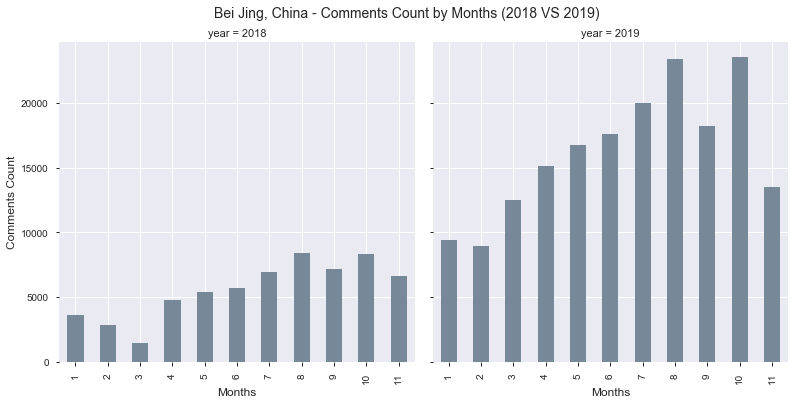

In [49]:
graph = sns.FacetGrid(beijing_reviews_groupby, col="year", col_order=[2018, 2019], height=5.5, aspect=1)
def plot(*args,**kwargs):
    kwargs["data"].plot(kind="bar", x="month", y="count", ax=plt.gca(), color="lightslategray")
graph.map_dataframe(plot)
graph.set_xlabels('Months', fontsize=12, ha='center')
graph.set_ylabels('Comments Count', fontsize=12, ha='center')
graph.fig.suptitle('Bei Jing, China - Comments Count by Months (2018 VS 2019)', fontsize=14, ha='center')
plt.subplots_adjust(top=0.89)
plt.show()

In [27]:
hongkong_reviews.head(10)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,69074,181973,2011-02-14,358597,Chi Yan,Lovely apartment in a great location that quic...
1,69074,252237,2011-05-05,467243,Doreen,"As a former resident of HK, I can say that Amy..."
2,69074,400484,2011-07-27,696753,Michael,I stayed in this Apt for about 12 days. Such a...
3,69074,411022,2011-08-01,40901,Donna,"Amy's cute, comfortable apartment is in the he..."
4,69074,497498,2011-09-03,341618,Melissa,Amy was the perfect host - extremely communica...
5,69074,538628,2011-09-17,544594,Lee,Amy's apartment is really cozy and well appoin...
6,69074,554405,2011-09-21,949163,Elisa & JP,"Amy's flat is so lovely, you really feel like ..."
7,69074,569952,2011-09-26,1037045,Arun,"We stay from Sept 20 to 25, 2011 for HK gems f..."
8,69074,619873,2011-10-11,748874,Jessica,I had a wonderful stay @Amy's lovely apartment...
9,69074,728812,2011-11-18,1344180,Stefan,Had an excellent stay. Better than any hotel o...


In [50]:
hongkong_reviews   = hongkong_reviews.sort_values(by=['date'], ascending=False)
hongkong_reviews['year'] = pd.DatetimeIndex(hongkong_reviews['date']).year
hongkong_reviews['month'] = pd.DatetimeIndex(hongkong_reviews['date']).month
hongkong_reviews = hongkong_reviews[hongkong_reviews['date'] >= '2018-01-01']
hongkong_reviews = hongkong_reviews.reset_index(drop=True)
hongkong_reviews.head(10)

,listing_id,id,date,reviewer_id,reviewer_name,comments,year,month
0,1634794,566320627,2019-11-19,27580259,Haifeng,"留下最深刻印象的,是房東的開誠､熱忱､坦率與文明,完全符合外人對於一位精英香港本地人的預期｡...",2019,11
1,21289471,566308328,2019-11-19,178567206,Nara,The host canceled this reservation 11 days bef...,2019,11
2,29864411,566309762,2019-11-19,27209400,Ginnie,"The apartment is in a good location, very cent...",2019,11
3,22088298,566340210,2019-11-19,2336199,Witold,"Clean, easy check in and perfect location. My ...",2019,11
4,18142109,566325270,2019-11-19,103958645,Kin Mun,"Clean,great location,fast respond",2019,11
5,26196050,566379968,2019-11-19,124344355,Sabrina,The host canceled this reservation 45 days bef...,2019,11
6,26196050,566380140,2019-11-19,101376178,Adri,The host canceled this reservation 31 days bef...,2019,11
7,37276458,566427958,2019-11-19,196623324,Harold,The host canceled this reservation 13 days bef...,2019,11
8,21289471,566308349,2019-11-19,37357042,Sharon,The host canceled this reservation 36 days bef...,2019,11
9,10262454,566323441,2019-11-19,142271037,Colleen,Excellent host! Gave me perfect directions fro...,2019,11


In [51]:
hongkong_reviews['anomaly'] = hongkong_reviews.comments.str.find('The host canceled this reservation')
print(hongkong_reviews['anomaly'].value_counts())

hongkong_reviews.loc[hongkong_reviews.anomaly == 0]
hongkong_reviews = hongkong_reviews[hongkong_reviews['anomaly'] != 0]
hongkong_reviews = hongkong_reviews.drop(columns=['anomaly'])
hongkong_reviews = hongkong_reviews.reset_index(drop=True)
hongkong_reviews.info()

-1    153973
 0      1560
Name: anomaly, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153973 entries, 0 to 153972
Data columns (total 8 columns):
listing_id       153973 non-null int64
id               153973 non-null int64
date             153973 non-null object
reviewer_id      153973 non-null int64
reviewer_name    153973 non-null object
comments         153973 non-null object
year             153973 non-null int64
month            153973 non-null int64
dtypes: int64(5), object(3)
memory usage: 9.4+ MB


In [52]:
hongkong_reviews_groupby = hongkong_reviews.groupby(['year', 'month'])
hongkong_reviews_groupby = hongkong_reviews_groupby['comments'].count()
print(hongkong_reviews_groupby)
hongkong_reviews_groupby = hongkong_reviews_groupby.to_frame('count')
hongkong_reviews_groupby.reset_index(inplace=True)

year  month
2018  1        5494
      2        4691
      3        5018
      4        6198
      5        5136
      6        5273
      7        6589
      8        7680
      9        5749
      10       7977
      11       8262
      12       8475
2019  1        9140
      2        8579
      3        9421
      4        9282
      5        9199
      6        7735
      7        7844
      8        5530
      9        3881
      10       5105
      11       1715
Name: comments, dtype: int64


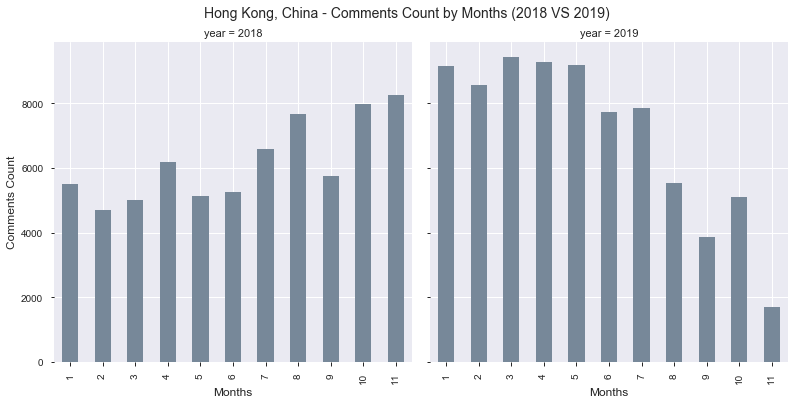

In [54]:
graph = sns.FacetGrid(hongkong_reviews_groupby, col="year", col_order=[2018, 2019], height=5.5, aspect=1)
def plot(*args,**kwargs):
    kwargs["data"].plot(kind="bar", x="month", y="count", ax=plt.gca(), color="lightslategray")
graph.map_dataframe(plot)
graph.set_xlabels('Months', fontsize=12, ha='center')
graph.set_ylabels('Comments Count', fontsize=12, ha='center')
graph.fig.suptitle('Hong Kong, China - Comments Count by Months (2018 VS 2019)', fontsize=14, ha='center')
plt.subplots_adjust(top=0.89)
plt.show()

In [28]:
singapore_reviews.head(10)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,49091,8243238,2013-10-21,8557223,Jared,Fran was absolutely gracious and welcoming. Ma...
1,50646,11909864,2014-04-18,1356099,James,A comfortable room in a smart condo developmen...
2,50646,13823948,2014-06-05,15222393,Welli,Stayed over at Sujatha's house for 3 good nigh...
3,50646,15117222,2014-07-02,5543172,Cyril,It's been a lovely stay at Sujatha's. The room...
4,50646,15426462,2014-07-08,817532,Jake,"We had a great experience. A nice place, an am..."
5,50646,15552912,2014-07-11,10942382,Subba,Quiet condo. Comfortable stay and good location.
6,50646,15884470,2014-07-17,17569265,Claire,Nice room and friendly stay. Kindely and smili...
7,50646,16123989,2014-07-22,17188672,Hana,"Suja and her husband are really nice, amazing,..."
8,50646,16632638,2014-07-30,18067306,Liz,Sujatha is a wonderful host and gives us a lot...
9,50646,16729657,2014-08-01,9211315,Derrick,A wonderful experience & highly recommended! S...


In [30]:
taipei_reviews.head(10)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,68396,4743816,2013-05-23,3334370,Scott,Great location ( very close to the metro stati...
1,68396,279164758,2018-06-20,183745170,Yamada,Very good place!!!\n
2,68398,2894700,2012-11-16,3534183,Laura,I enjoyed my stay very much! Spend approx 6 we...
3,68398,13416072,2014-05-27,12750484,Maggie,I ended up staying in Studio B. Apartment is c...
4,68398,22427468,2014-11-06,21131563,Vincent,"Lisa est très efficace, le logement est foncti..."
5,68398,48514756,2015-09-27,31102107,Romney,I arrived a little early but Vincent valiantly...
6,68398,58001272,2015-12-31,44450239,Sheila,Our host made us feel very welcomed and was al...
7,68398,117113566,2016-12-04,26120062,Kathryn,"Awesome location. Cute, clean and stocked wit..."
8,68398,431471395,2019-04-01,126013182,Ha Neul,"Fair rate, clean room, comfortable bed, nice l..."
9,74641,730893,2011-11-20,933072,Yixi,3036 is a great find. The place is newly renov...


In [31]:
tokyo_reviews.head(10)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,35303,810980,2011-12-28,1502908,Firuz,Miyuki's has been a great host. Helpful and ve...
1,35303,2467161,2012-10-01,350719,Jordan,Nice apartment in one of the best areas of Tok...
2,35303,3572628,2013-02-18,4917704,Aymeric,A very nice host and place. The location is in...
3,35303,3952097,2013-03-30,3243253,Blandine,Miyuki is the most smily face I met when I lan...
4,35303,4377509,2013-05-01,1536097,Kayleigh,The location's wonderful. It's close to Haraju...
5,35303,4594739,2013-05-14,1822025,Danielle,Miyuki was so very helpful and stayed back aft...
6,35303,6847361,2013-08-27,6980559,Tobias,"The apartment is an affordable, simple and cen..."
7,35303,19211289,2014-09-08,2893501,Yan,Thanks Miyuki for a great stay. \nAs described...
8,35303,23170075,2014-11-24,8674085,San,It was great stay. Everything was as described...
9,35303,27408652,2015-03-03,27944062,Kim Seng,"My first ever solo trip to Tokyo, Japan has be..."


In [19]:
zh_2019 = pd.read_csv("chinese_comments.csv", index_col='Month')
en_2019 = pd.read_csv("foreign_comments.csv", index_col='Month')

In [20]:
zh_2019

,Beijing,Hong Kong,Taipei
Month,,,
Jan,8621,4106,5934
Feb,8396,4914,6758
Mar,11437,4113,6280
April,13733,3723,6635
May,15506,4722,7429
June,16261,3489,7722
July,18685,4000,8021
Aug,22186,2364,8795
Sept,17113,960,6017


In [21]:
en_2019

,Beijing,Hong Kong,Taipei
Month,,,
Jan,775,5028,5606
Feb,547,3662,3750
Mar,1066,5302,5867
April,1430,5554,5890
May,1243,4472,5834
June,1323,4241,5242
July,1300,3840,4833
Aug,1227,3162,5237
Sept,1124,2920,5355


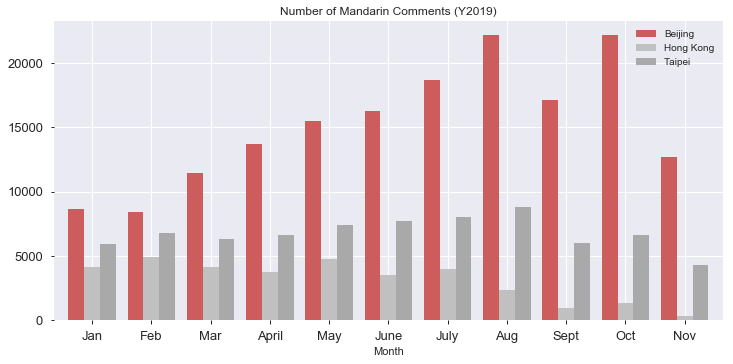

In [64]:
colors = ['indianred', 'silver', 'darkgrey']
plt_zh = zh_2019.plot.bar(align='center', color=colors, figsize=(12,5.5), rot=0, width=0.8,fontsize=13, title="Number of Mandarin Comments (Y2019)")
